# simple PHREEQC

Just wrote something that would start from acidic pH and titrate up in pH and see what minerals might precipitate.  Not very realistic that hematite would form at all pHs as the model shows.

In [5]:
% setup environment
% clear data and number format
clear; format short e
% set path to equilibrium solver
txt=pwd; n=length(txt); rootpath=txt;
n=strfind(rootpath,"USERS"); rootpath=txt(1:n-2);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% turn off warnings
warning off
%graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 
%graphics_toolkit("gnuplot")

In [6]:
% define equilibrium problem

AlT=5e-5; FeT=1e-3; CaT=1e-4; KT=1e-4; MgT=1e-5; ClT=1e-2;
pH=2:0.2:12; pe=20.75-pH; T=25; show=0;
pHfixcheck=0; %1 makes the pH fixed, 0 means pH is free to vary (same for pe). 

In [7]:
% MODEL USING PHREEQC

minerals=[{'Calcite'};{'Aragonite'};{'Dolomite'};{'Gibbsite'};{'Al(OH)3(a)'};{'Hematite'};{'Fe(OH)3(a)'};{'CO2(g)'}]; 
% open to atmospheric CO2 P=10^-3.5atm (hard coded into how I handle if CO2(g) is a mineral phase
totalvector=[AlT; FeT; CaT; KT; MgT; ClT]; totalnames=[{'Al'}; {'Fe'};{'Ca'};{'K'};{'Mg'};{'Cl'}]; 
speciesexport=[{'Al+3'}; {'Fe+3'}];
acid=['HCl']; 
database=['phreeqc.dat']; 

for i=1:length(pH)

[solutionspeciesconcs, speciesnames, solidconcs, solidnames]=...
runPHREEQCv3(T,pH(i),pe(i),totalnames,totalvector,minerals,speciesexport,database,show,acid,pHfixcheck);

Alplus3(i)=solutionspeciesconcs(1); 
Feplus3(i)=solutionspeciesconcs(2); 

calcite(i)=solidconcs(1);
aragonite(i)=solidconcs(2);
dolomite(i)=solidconcs(3);
gibbsite(i)=solidconcs(4);
AmAlOH3(i)=solidconcs(5);
Hematite(i)=solidconcs(6);
AmFeOH3(i)=solidconcs(7);

end


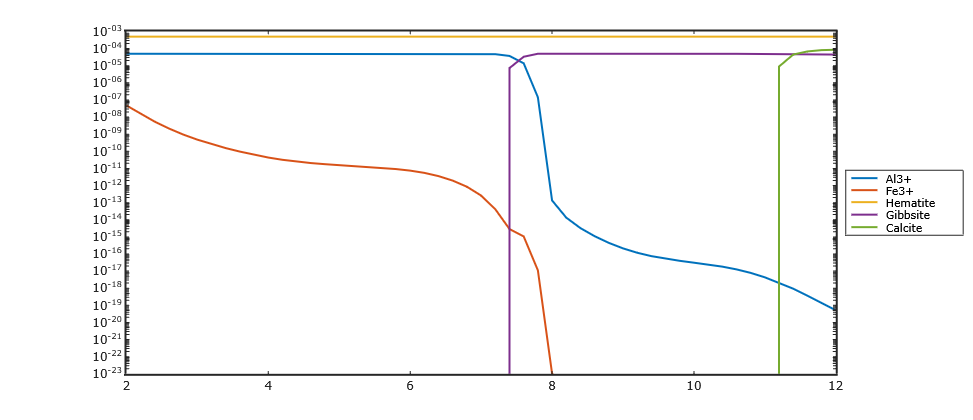

In [8]:
semilogy(pH,Alplus3,'linewidth',2,pH,Feplus3,'linewidth',2,...
pH,Hematite,'linewidth',2,...
pH,gibbsite,'linewidth',2,...
pH,calcite,'linewidth',2)
set(gca,'linewidth',2,'fontsize',12)
legend('Al3+','Fe3+','Hematite','Gibbsite','Calcite','location','eastoutside')
axis([2 12 1e-23 1e-3])